# The Poisson Distribution & Poisson Point Processes

In mathematics, a **Poisson point process** is one where points or events occur at a constant overall rate $\lambda$ over an interval of time or space (e.g. 5 emails per day, 2 errors per printed page, etc.), but the precise moment at which a specific event occurs in a given time or space interval obeys a random variable. To distinguish from situations where $\lambda$ is given as a time-dependent function, $\lambda = f(t)$, a Poisson process where $\lambda$ is constant is called a **homogenous**, **uniform**, or **stationary** Poisson process. In many applications, such as the one we will examine here, the process only takes on *discrete* values, allowing us to calculate an exact probability. Several conditions must be satisfied:

<ol>
        <li>The occurrence of a particular event is independent of the overall rate, $\lambda$.</li>
        <br></br>
        <li>Each occurrence is independent of any other.</li>
        <br></br>
        <li>More than one event cannot occur at exactly the same moment.</li> </ol>


The name of the process comes from the fact that the random occurrence of events within a given fixed interval of time and a given constant rate obeys the **Poisson distribution**: given a rate of $\lambda$, the probability of seeing $k$ events within the fixed interval is given by the probability mass function:

$$
f(k, \lambda) = P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

where $e$ is the base of the natural logarithm:
$$
e \approx 2.71828
$$
and $!$ is the factorial function.

Although it is less pertinent to our discussion here, it can be shown that the Poisson distribution is the limit of a Binomial distribution with probability of success $p$ over $n$ trials as $n \to \infty$. Specifically, if $X$ is a Binomial random variable with parameters $k$, $n$, and $p$, and $\lambda = np$ is held constant, then:


$$\lim_{n \to \infty} P(X = k) = \lim_{n \to \infty} {n \choose k}p^k(1-p)^{n-k} = \lim_{n \to \infty} \frac{n!} {(n-k)!k!} p^k(1-p)^{n-k} = \frac{\lambda^k e^{-\lambda}}{k!}$$

which is the probability mass function of the Poisson distribution with parameter $\lambda$.

It can be show that in addition to being the intensity rate, $\lambda$ also possesses the following properties under the Poisson distribution:

$$\lambda = E(X) = Var(X)$$

where $E(X)$ is the **expected value** of the distribution and $Var(X)$ is the **variance**. The Poisson distribution is used when we are interested in calculating the probability that an event will have a certain number of occurrences in a fixed interval of time. For example, the number of product defects that a factory might discover on any given day. Let's use this example to demonstrate how a Poisson process works. We'll be using Python's **numpy** and **scipy**libraries to perform the calculations.

In the example given above, $λ$ is the expected number of defects to be discovered on any given day, although in reality, the number of actual defects discovered on a particular day could be different. Let's say that the expected number of defects to be found is 7 defects per day. This is our *intensity rate*, $\lambda$ = $7$. 

Then the equation for the probability of $k$ defects being found on any given day is:

$$
P(X=k) = \frac{e^{-7} 7^k}{k!}
$$

We'll begin by importing the necessary Python libraries: __numpy__ and the stats module within __scipy__. We'll also set $λ = 7$ to be used throughout the project. Using $λ$ instead of the number 7 will also help keep our code readable when we have several numerical arguments within a given method:

In [1]:
# Import numpy and the Poisson distribution module in scipy.stats
import numpy as np
from scipy.stats import poisson

# Set λ = 7
λ = 7

We can visualize the distribution like this:

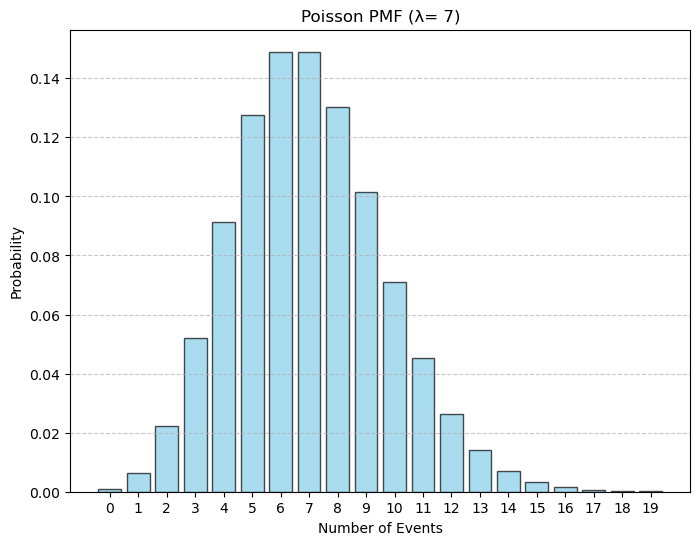

In [2]:
# Import matplotlib's pyplot module
import matplotlib.pyplot as plt

# Define the range of x values (number of events)
x_values = np.arange(0, 20)  # Range from 0 to 19

# Compute the PMF
pmf_values = poisson.pmf(x_values, λ)

# Plot PMF
plt.figure(figsize=(8, 6))
plt.bar(x_values, pmf_values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Poisson PMF (λ= 7)')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.xticks(x_values)  # Show all x values as ticks
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Let's begin by calculating the probability that the number of defects found on a particular day will actually be equal to 7. Since the Poisson distribution is a _discrete_ probability distribution, it takes on a countable number of values. Therefore, we can use a **probability mass function (PMF)** to calculate the probability of an exact number of occurrences rather than only a range of values (as would be the case for a continuous random variable):

In [3]:
# Calculate the probability of λ under the Poisson distribution
prob_λ = poisson.pmf(λ, λ) * 100

# Display prob_λ
prob_λ

14.900277967433773

Given that the expected value $\lambda$ of our distribution is 7, the probability that we actually encounter exactly 7 defects on any given day is 14.9%. Note that the above syntax includes multiplication by 100, so prob_λ is a _percentage_. Without the multiplication by 100, we would get a decimal value (.0149...) between 0 and 1, as would be expected.

Let's say that an exceptionally good day for the factory occurs when no more than 4 defects are found in one day. What is the probability of this occurring?

We are now interested in the probability of 4 _or fewer_ defects, so we are interested in the probability of 0, 1, 2, 3, _or_ 4 defects. We could calculate the probability of each possibility individually using the probability mass function, but it will be more efficient to instead use a **cumulative density function (CDF)** with 4 as our given parameter. This will calculate the probability of all possible values for 4 or fewer:


$$
P(X \leq 4) = \sum_{k=0}^{4} \frac{e^{-7} \times 7^k}{k!}
$$


Fortunately, scipy's stat's module has a CDF method:

In [4]:
# Calculate the probability of 4 or less under the Poisson distribution
fewer_than_4 = poisson.cdf(4, λ) * 100

# Display fewer_than_4
fewer_than_4

17.299160788207146

Again, we multiplied by 100, so the probability that the factory will find 4 or fewer defects in one day is 17.3%.
<br></br>
On the other hand, the factory views more than 9 defects as a bad day. What is the probability of this happening?
<br></br>
Note that the wording here tells us that 9 is _not_ to be included in our calculation. To most effectively calculate this, it is more advantageous to calculate the _complement_ of what we're asked. If the probability of event $A$ is given by $P(A)$, then the probability of the complement of $A$, denoted as $P(A^c)$ is given by:

$$ P(A^c) = 1 - P(A) $$

The complement of "more than 9" is "9 or fewer". We then subtract the probability of 9 or fewer defects being found from 1 to obtain the probability of more than 9 defects being found. 

We again use a cumulative density function to calculate the probability of 9 or fewer defects occurring and subtract this value from 1:

$$
P(X > 9) = 1 - \sum_{k=0}^{9} \frac{e^{-7} \times 7^k}{k!}
$$

In Python, we write:

In [5]:
# Calculate the probability of 9 or more occurrences
more_than_9 = (1 - poisson.cdf(9, λ)) * 100

# Display more_than_9
more_than_9

16.950406276132668

The probability of more than 9 occurrences on a given day is 16.95%.
<br></br>
Now that we've looked at a few examples of probabilities for only one day, let's look at probabilities on a larger scale. Let's say the factory wants to track information about the number of defects over 1 year. While many real factories would certainly not be open every day of the year, let's assume for simplicity's sake that it is. If the factory records the number of defects found at the end of the day, we'd have a list of 365 values. 

Let's create an experiment that simulates this.

First, we want to create a set of 365 randomly-generated values given the Poisson distribution with $λ = 7$. In this case, we'll use the **random variate sample (RVS) method**:

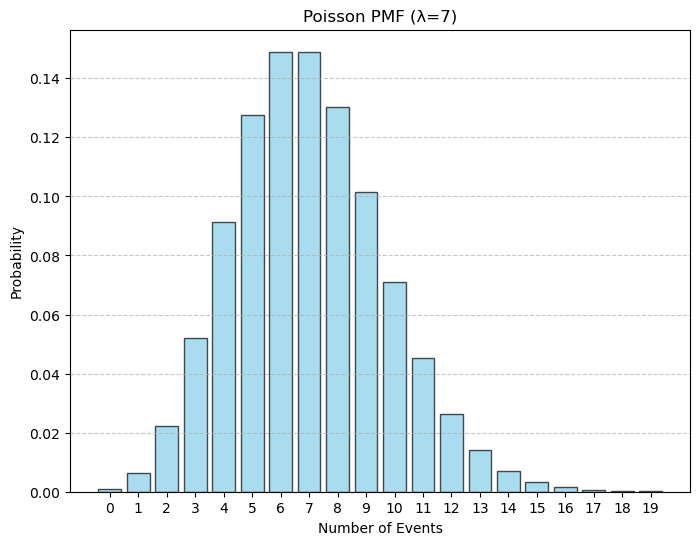

In [6]:
import matplotlib.pyplot as plt
lambda_param = 7  # Rate parameter (average number of events)

# Define the range of x values (number of events)
x_values = np.arange(0, 20)  # Range from 0 to 19

# Compute the PMF
pmf_values = poisson.pmf(x_values, mu=lambda_param)

# Plot PMF
plt.figure(figsize=(8, 6))
plt.bar(x_values, pmf_values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Poisson PMF (λ={lambda_param})')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.xticks(x_values)  # Show all x values as ticks
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Randomly generate 365 values under the given Poisson distribution
year_defects = poisson.rvs(λ, size = 365)

# Display year_defects
year_defects

array([11, 11,  7,  4,  3,  2, 14,  7,  5, 14, 11,  6,  8,  7,  7, 10,  6,
        9,  5,  8, 10,  4,  5,  4,  7,  6, 10,  5,  8,  4,  7, 10,  7,  7,
        7,  5,  5,  5,  5,  6,  6,  3,  7,  5,  6,  6,  6, 12, 11,  7,  7,
        6,  7,  3,  8, 10,  9,  8,  4,  6,  4, 10,  5,  8,  1,  5,  6,  8,
        8,  8,  9,  8,  8, 11,  1,  9,  8,  6,  6,  5,  5, 11,  8,  8,  3,
       13,  9,  8,  3,  2,  7,  6, 10,  6,  8,  5, 10,  6,  6,  8,  5, 11,
       10,  9,  8,  3, 10,  3,  4,  7,  5,  7,  8,  6,  8,  4,  9,  6,  9,
        5,  7,  4,  9,  8,  8,  6,  5, 12,  7,  7,  8, 12,  3, 10, 13,  9,
       14,  7,  5,  3,  8,  7,  8,  8,  8,  8,  6,  3, 10,  4,  8,  7,  7,
        5,  8,  7,  8,  6, 11, 11,  5,  8,  8,  5,  7,  8,  5,  5,  5,  6,
        3,  8,  8,  9,  6,  3,  3,  6,  9,  5,  4,  4,  6,  6,  9,  4,  9,
        2,  5, 12,  8,  6, 12, 10,  3,  7, 10,  7,  9,  6,  3, 14, 13,  8,
        6, 14, 13,  4,  5,  6, 10,  4,  5, 11,  9,  8,  7, 14,  9, 11,  3,
        4,  3,  6,  7,  9

Because the values are randomly generated, running the function again will yield a different random set of 365 values:

In [8]:
# Randomly generate 365 values under the given Poisson distribution
year_defects = poisson.rvs(λ, size = 365)

# Display year_defects
year_defects

array([10,  6,  4,  9,  6,  5,  6,  6,  7,  4,  9,  6,  9, 10,  6,  6,  8,
        7,  9,  8,  7,  8,  5,  8,  4,  3,  8,  6,  8,  8,  3,  9,  5,  6,
        3,  9,  5, 11, 10,  8, 10,  8,  7,  6,  7,  8,  5,  2,  7,  4,  8,
        8,  2,  7,  7,  2,  5,  8,  9,  6,  8,  8,  7,  6,  6,  3,  6,  9,
        6,  7,  8,  6,  4,  8,  9,  6,  6,  4,  4,  2,  6,  5,  5,  8,  4,
        6,  5,  9, 14,  5,  7,  7, 11, 12,  6,  7, 10,  4,  4,  8,  9, 12,
        3,  4,  9,  6,  4, 10,  7,  9,  7,  7,  3,  6,  4,  9,  6,  3,  4,
        7,  7,  5,  6,  7, 13,  7,  5, 13,  9,  4,  7,  4,  4,  5,  7, 12,
        7, 11,  8,  3, 11,  8,  7,  6,  8, 10,  9,  5,  8,  8,  3,  9,  6,
        8,  7, 15,  5, 11,  7,  9,  7,  8,  8,  7,  9,  4,  6, 10, 12,  4,
        4, 11, 12,  5,  7,  7,  6,  4, 11,  7,  5,  5,  7,  5,  6, 10,  5,
        1,  9,  7,  4, 10, 13, 11,  4,  5,  3,  4, 11,  4,  4,  5,  5,  7,
        9,  4,  6,  4,  4,  5,  8,  7,  6,  7,  7,  7,  6,  4,  5,  8, 10,
        8, 10,  9,  5,  8

Since we are simulating an experiment and want to make the results reproducible for a reader, we can choose a **random seed value** that will produce the same random variate sample each time we run it. We'll follow the custom of using a random seed value of 42 and redefine the variables year_defects after doing so:

In [9]:
# Set random seed = 42
np.random.seed(42)

# Randomly generate 365 values under the given Poisson distribution
year_defects = poisson.rvs(λ, size = 365)

# Display year_defects
year_defects

array([ 6,  7,  6,  7,  7,  4, 12,  2,  7,  5,  7,  6, 10,  3,  6, 12,  5,
        6,  9,  6, 10,  4,  4,  7,  8, 11,  3,  2, 10,  6,  9,  6, 10, 10,
       14,  3,  5,  7,  8,  3,  7, 10,  2,  5,  6,  6,  7,  7,  3,  5, 12,
       10,  4, 12,  6,  4,  5, 11,  3,  3,  9,  6,  9,  9, 16,  5,  7, 13,
       10,  5,  3, 11,  8,  3,  4,  5,  3,  6,  6,  8,  7,  5,  7,  6,  8,
        4,  6, 10,  6,  6,  5, 10,  7,  7,  9,  9,  9,  8,  8,  7,  9,  8,
        8,  3,  8,  7,  4,  5,  5,  7,  7,  4,  4,  5,  9,  2,  8,  8,  6,
        8,  4,  4,  9,  4,  7,  6,  6,  8,  5, 12,  8, 10,  4,  6,  6, 16,
        4,  1,  8, 11,  5, 10,  6,  9,  6, 14,  8,  8,  8,  9,  6,  7,  9,
        8, 10,  6,  7,  8,  6,  1,  7,  5,  4,  3,  6,  4,  9,  8,  6, 11,
        6,  7, 11,  8,  8,  7,  8,  7,  4,  6,  5,  8,  7, 10, 10, 15,  3,
        7,  8, 10,  3,  5,  7,  6,  9, 11,  7,  6,  5, 10,  5,  5,  8,  9,
        5, 11,  8,  6, 10,  9, 11,  4,  5,  6,  5,  6,  4, 10,  5,  4,  3,
        9,  7,  9,  9,  4

Now, no matter how many times we run the code in cell 14, "year_defects" will always be assigned the same exact values.

Let's explore these values a bit more. First, let's calculate the _expected_ number of defects to be found given a Poisson distribution with $λ = 7$. Since we're interested in how many defects we expect to find in 365 days, we just multiple $λ$ by 365:

In [10]:
# Calculate the expected number of defects in one year
λ * 365

2555

Under our given Poisson distribution, we would expect to find 2555 defects.

How does our randomly generated list compare?

In [11]:
# Calculate the total number of defects found in the list year_defects 
np.sum(year_defects)

2534

This does not seem extraordinarily far off from the expected value above, but since this is a _random_ sample, we should expect to see some variation. Let's see what happens when we change the value of our random seed to 10:

In [12]:
# Set the random seed value to 10
np.random.seed(10)

# Generate a new random sample under the Poisson distribution
year_defects_seed10 = poisson.rvs(λ, size = 365)

# Generate year_defects2
year_defects_seed10

array([ 5,  6, 10, 10,  4,  9,  7,  7,  4,  6,  7,  6,  9,  7,  5,  6,  5,
        8, 10,  7,  4, 12,  7,  6,  7,  9,  7,  2,  6,  9,  9,  8,  9,  8,
        4,  8,  7,  6,  6,  6,  4,  5,  8,  9,  6,  6,  7,  8,  7,  3,  2,
        6, 11,  7,  6,  9,  7,  8,  1,  8, 13,  7,  4,  4,  3,  5,  4, 10,
        5,  4,  5,  4,  2, 10,  2,  4,  6,  9,  6,  5,  7,  8,  8,  4,  4,
        9,  5,  4,  6, 11,  8, 12,  3,  8, 10,  7,  7,  7,  9,  4,  9, 11,
        8,  7, 13,  9,  8,  7,  4,  6,  9,  7,  6, 10,  6,  8,  5, 12,  6,
       10, 10,  4,  7,  4,  6,  4,  7,  3,  6,  7,  6,  8,  6,  7,  7,  5,
        5,  9,  8,  9,  4,  9,  5,  8,  8,  9,  6,  2,  1, 10,  5,  7,  6,
        9, 10,  6, 10,  3,  4, 11,  7,  8,  3,  8, 13,  7,  7,  6,  6,  8,
        2,  9,  7,  4,  8, 10,  5, 13,  3,  7,  7,  5,  6, 10,  7, 11,  9,
        9,  8,  8,  8,  8, 10,  6,  5,  6,  3, 11,  6,  7,  7,  4, 14, 11,
       11,  6,  7,  4,  6,  9,  4,  6,  8,  9,  5,  5,  5,  8,  4,  7,  6,
        5,  8,  5, 13,  3

Now let's calculate the new sum:

In [13]:
# Calculate the sum of our new set
np.sum(year_defects_seed10)

2462

This is a difference of almost 100. Let's also calculate the mean of both lists:

In [14]:
# Calculate the means
np.mean(year_defects), np.mean(year_defects_seed10)

(6.942465753424657, 6.745205479452054)

Neither are quite equal to our $λ$ value of 7. Should we be worried about this?

Since we've generated lists one at a time, we should expect to see some variation. However, by the **Law of Large Numbers**, if we generate enough lists, we should expect the calculated values to converge to the theoretical values. Let's explore this by generating 500 different samples:

In [15]:
# Create an empty list
year_lists = []

# Set the seed value to 42
np.random.seed(42)

# Create a "for" loop that generates 500 sample sets under our distribution and append each set to year_lists
for i in range(500):
    rvs = poisson.rvs(λ, size = 365)
    year_lists.append(rvs)

Now let's find the total number of defects for each of the 500 trials:

In [16]:
# Create an empty list to store our sums
list_of_sums = []

# Create a "for" loop to loop over the elements of year_lists, finding the sum of each list and appending it to list_of_sums
for list in year_lists:
    sum = np.sum(list)
    list_of_sums.append(sum)

# Calculate the average sum
np.mean(list_of_sums)

2555.976

We see that the average number of defects across our 500 simulations is almost exactly our expected value.
<br></br>
Let's return to our 1st random generated list, year_defects, with with a random seed value of 42:

In [17]:
# Set random seed = 42
np.random.seed(42)

# Randomly generate 365 values under the given Poisson distribution
year_defects = poisson.rvs(λ, size = 365)

# Display year_defects
year_defects

array([ 6,  7,  6,  7,  7,  4, 12,  2,  7,  5,  7,  6, 10,  3,  6, 12,  5,
        6,  9,  6, 10,  4,  4,  7,  8, 11,  3,  2, 10,  6,  9,  6, 10, 10,
       14,  3,  5,  7,  8,  3,  7, 10,  2,  5,  6,  6,  7,  7,  3,  5, 12,
       10,  4, 12,  6,  4,  5, 11,  3,  3,  9,  6,  9,  9, 16,  5,  7, 13,
       10,  5,  3, 11,  8,  3,  4,  5,  3,  6,  6,  8,  7,  5,  7,  6,  8,
        4,  6, 10,  6,  6,  5, 10,  7,  7,  9,  9,  9,  8,  8,  7,  9,  8,
        8,  3,  8,  7,  4,  5,  5,  7,  7,  4,  4,  5,  9,  2,  8,  8,  6,
        8,  4,  4,  9,  4,  7,  6,  6,  8,  5, 12,  8, 10,  4,  6,  6, 16,
        4,  1,  8, 11,  5, 10,  6,  9,  6, 14,  8,  8,  8,  9,  6,  7,  9,
        8, 10,  6,  7,  8,  6,  1,  7,  5,  4,  3,  6,  4,  9,  8,  6, 11,
        6,  7, 11,  8,  8,  7,  8,  7,  4,  6,  5,  8,  7, 10, 10, 15,  3,
        7,  8, 10,  3,  5,  7,  6,  9, 11,  7,  6,  5, 10,  5,  5,  8,  9,
        5, 11,  8,  6, 10,  9, 11,  4,  5,  6,  5,  6,  4, 10,  5,  4,  3,
        9,  7,  9,  9,  4

Let's say we want to know on what value $x$ the 90% percentile falls: in other words, on 90% of days, we can expect to find $x$ or fewer defects. This is identical to asking the question: for what value $x$ will the cumulative distribution function of $x$ under a given probability distribution be equal to .90: 

$$P(X \leq x) = 0.90 = \sum_{k=0}^{x} \frac{e^{-7} 7^k}{k!}$$



In Python, we're asking for what value $x$ will the running the code stats.poisson.cdf(x, λ) output .90?

In scipy.stats, we can use the **probability point function (PPF)** to do this:

In [18]:
# Set x equal to the probability point function of .90 under the given Poisson distribution
x = poisson.ppf(.90, λ)

# Display x
x

10.0

We verify this result by entering 10 as our parameter into scipy's CDF method:

In [19]:
# Calculate the cumulative distribution function at 10 of our Poisson distribution
poisson.cdf(10, λ)

0.9014792058890873

This is the same as saying that the 90th percentile of the data is 10, or that 90% of the time we should encounter 10 or fewer defects on any given day.

Let's look at the maximum and minimum of this data set and calculate the probability of getting each one:

In [20]:
# Calculate the maximum and minimum of our list year_defects and their respective CDFs
max = np.max(year_defects)
min = np.min(year_defects)
cdf_max = poisson.cdf(max, λ)
cdf_min = poisson.cdf(min, λ)

# Print the results
print(f"The probability of finding more than {max} defects or fewer is {(1 - cdf_max) *100:.2f}%.")
print(f"The probability of finding more than {min} defect or fewer is {(1 - cdf_min) * 100:.2f}%.")

The probability of finding more than 16 defects or fewer is 0.10%.
The probability of finding more than 1 defect or fewer is 99.27%.


Having explored the properties of the Poisson distribution, let's explore some other properties of Poisson point processes in general. As we defined above, a Poisson process has an overall intensity rate $\lambda$ for a given period of time, but the number of actual occurrences $k$ that occur within the established period of time is random. Additionally, we do not know how much time occurs *between* individual occurrences, other than the fact that events cannot be simultaneous. That is, if $t_i$ is the time of the $i^{th}$ event, then for any two distinct events $j$, $k$:

$$t_j \neq t_k$$

However, it is possible to calculate the *probability* of a certain amount of time passing between events in a Poisson process. The probability distribution used for this purpose is the **exponential distribution**. Since any amount of time can pass between two events, we are dealing with a *continuous* variable that follows a probability density function. Given intensity parameter $\lambda$, the probability density function that time $t$ passes between any 2 *consecutive* events is:

$$f(t; \lambda) =
\begin{cases}
\displaystyle
\lambda e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}$$

The equation tells us that the probability that a certain amount of time $t$ will pass between any two events $i$, $j$ is given by the same equation. This, of course, does not tell us how much time actually passes between two occurrences, just the *probability* that a certain amount of time will pass. Some examples of the exponential distribution include the time between asteroid collisions and the time of radioactive particle decay.

Although the situation we're modeling (the occurrence of defective products) might appear less complicated than particle decay, there is actually a potential hiccup that needs to be addressed. As stated above, the exponential distribution assumes that the intensity rate is constant. In our scenario, however, the intensity rate is certaintly *not* constant, as all occurrences of a product defect must happen within the operating hours of the facility. If production is not occurring, then there is a 0% probability of a defect until production begins again.

Let's assume an 8-hour workday. We should then revise our intensity rate to be expressed not in number of defects per day, but number of defects *per hour*. In this case, we rewrite our intensity rate of 7 defects per workday as:

$$ \lambda = \frac{7 \ \text{defects per day}} {8 \ \text{hours}} = .875 \ \text{defects per hour} $$

The **expected value** of the exponential distribution follows the definition of expected value for a continuous probability distribution:

$$ E(X) = \int_{-\infty}^{\infty} xf(x) \, dx. $$

Since the exponential distribution is defined to be 0 for any value $x < 0$, the expected value of the exponential distribution is:

$$ E(X) = \int_{0}^{\infty} t\lambda e^{-\lambda t} \, dt. $$

which, through elementary integration by parts, can be shown to be $ E(X) = \Large \frac{1}{\lambda}$  . 

The expected value of the exponential distribution is important, because it is needed to perform the calculation in scipy's stats module, which uses the *scale parameter*, or average time between events, rather than the *rate parameter*, $\lambda$. We demonstrate this below.

In the scenario we've used so far, what's the probability density of the exponential distribution at the one hour mark? The equation for the distribution becomes:

$$f(1/24; 7) = .875e^{-.875*1} $$

In scipy.stats, we can do this easily:

In [21]:
# Import the exponential distribution method from scipy.stats
from scipy.stats import expon

# Set parameters
rate_param = .875

# Time between defects
time_hours = 1

# Calculate the probability density function value
density_1_hour_passing = expon.pdf(1, scale = 1/rate_param)

# Display the probability density
density_1_hour_passing

0.36475426721869486

Importantly, this is *not* the probability that one hour will pass between the occurrence of defects. Remember, this is a probability *density* function. Since for any integrand, identical upper and lower limits of integration will give a value of 0, the probability of any discrete value for a random variable obeying a continuous distribution is not meaningful.

What we *can* ask is the probability of the next defect occurring within a specific period of time, say, an hour *or less*. In this case, we use the continuous distribution function of the exponential distribution. Since this will be 0 for any value < 0, we can begin the integration at the lower limit, 0:

$$ \int_{0}^{1} .875e^{-.875t} \, dt $$

In scipy.stats, this becomes:

In [22]:
# Calculate the CDF for time up to 1 hour
prob_under_1_hour = expon.cdf(1, scale = 1/rate_param)

# Display the result
prob_under_1_hour

0.5831379803214916

The probability that the next defect occurs within an hour is ~58%. Note that the exponential distribution is **memoryless**: the number of prior defects has no bearing on the probability of the next one occurring.

It is helpful to visualize the distribution function. We'll use python's matplotlib library to achieve this:

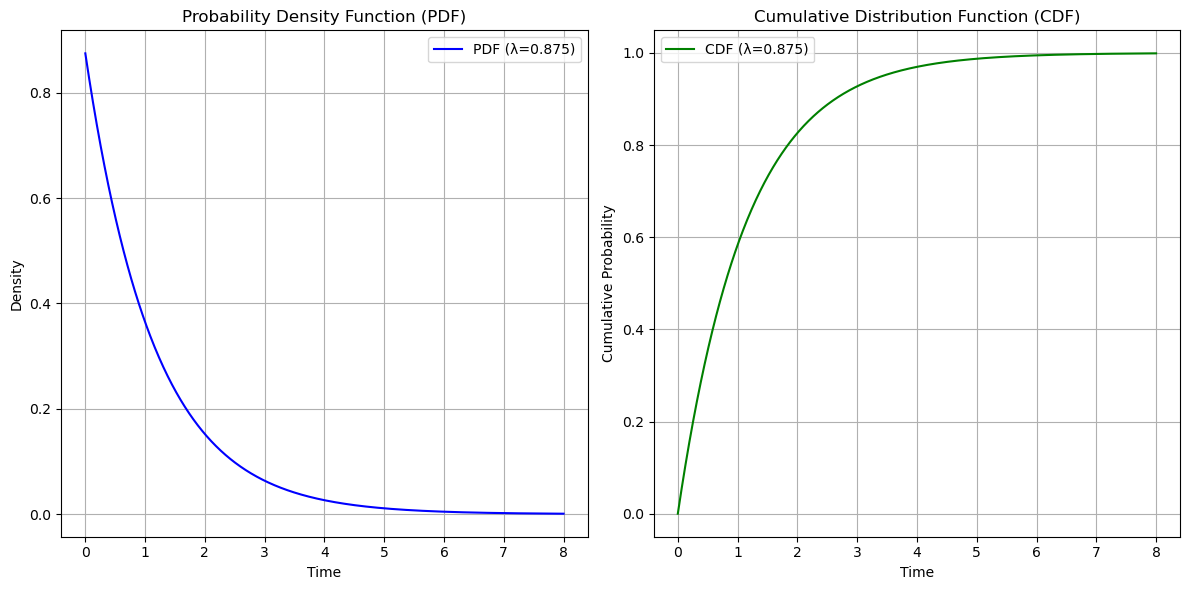

In [23]:
# Generate a set of 1000 x-values from 0 to 8 hours to create a smooth curve
x = np.linspace(0, 8, 1000)

# Define the values of the PDF and CDF functions over the x-values 
pdf_values = expon.pdf(x, scale= 1/rate_param)
cdf_values = expon.cdf(x, scale= 1/rate_param)

# Set the size of the overall plot
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label=f'PDF (λ={rate_param})', color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Time')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label=f'CDF (λ={rate_param})', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Time')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

It's important to note that the probability density function never actually reaches 0, and the cumulative distribution function never actually reaches 1. Since neither function has an upper limit, they both continue asymptotically toward their respective limit values. This makes sense, because as more time passes, it becomes more likely for the event to occur. But since the occurrence of the event is not guaranteed, the graph is asymptotic in nature.

Let's discuss one more aspect of a Poisson process, the amount of time we need to wait before we can expect $k$ occurrences. For a phenomenon that can take on a continous number of occurrences, the distribution used to model this behavior is the *Gamma distribution*, which takes its name from the distribution function's use of the **Gamma function**, which is defined via an improper integral.

Fortunately, when dealing with a discrete number of events (such as the number of defects per day), we use the *Erlang distribution*. The Erlang distribution has three parameters: time (a continuous variable), the rate or scale parameter, $\lambda$, and the shape parameter, $k$ which specifies a number of occurrences. The form of the distribution's equation depends on whether we use $\lambda$ (the rate parameter) or $\beta = 1/\lambda$ (the scale parameter). Using the rate parameter, the equation for the Erlang distribution is:

$$
f(t; k, \lambda) =
\begin{cases}
\displaystyle
\frac{(\lambda t)^{k-1} e^{-\lambda t}} {(k-1)!} & t \geq 0 \\
\strut \\
0 & t < 0
\end{cases}
$$

We have to be careful in how we understand the distribution because while the number of occurrences is discrete, the time that passes is not. Therefore, the distribution above is still a continuous one, and so it is defined via a probability density function. The discrete nature of the *phenomenon* is factored in this equation by the absence of the Gamma function, which accounts for a phenomenon with a continuous number of occurrences:

$$ \Gamma(z) = \int_{0}^{\infty} t^{z-1} e^{-t} \, dt $$

Now, to find the probability that $k$ events occur within a given period of time under a given $\beta$, we use the distribution's continuous distribution function, which can be expressed in either a hairy integral form involving something called the *incomplete Gamma function* **OR** since we've limited ourselves to discrete values, we can simplify the equation by a sum:

$$ F(t; k, \lambda) = \sum_{n=0}^{k-1} \frac{1} {n!} e^{-\lambda t} (\lambda t)^n\$$

Returning to our factory defects, we recall that our original rate parameter was given per day $\lambda$ = 7. We later turned this into a rate per hour given a work day of 8 hours, $\lambda = .875$. Now, if we're interested in seeing what the probability is that 7 occurrences within 8 hours given the rate parameter in hours of $\lambda = .875$ defects per hour, in scipy.stats this is done like this (note that scipy.stats uses the scale parameter $\beta = 1/\lambda$:

In [24]:
# Import the erlang module from scipy.stats
from scipy.stats import erlang

# Define parameters
k = 7
𝜆 = .875
scale_param = 1/𝜆
t_in_hours = 8

# Calculate the CDF for the Erlang distribution with the given parameters
prob_7_defects = erlang.cdf(t_in_hours, a = k, scale = scale_param)

# Display the result
prob_7_defects

0.5502889441513008

The probability that the 7th event will occur within 8 hours is ~55%.

It is important to note that this is a different question from the first one we asked: under the Poisson distribution with rate parameter $\lambda = 7$ what is the probability of exactly 7 events occurring? We saw that the probability of exactly 7 events occuring was ~15%. The Erlang distribution is used to calculate a slightly different question: what is the probability that the $k^{th}$ event occurs within time $t$ - in this case, within 8 hours. It does *not* tell us the probability that the $k^{th}$ event happens at time = $t$, which would be undefined given the continuous nature of the variable $t$. Instead, it tells us the probability that the $k^{th}$ happens at some time up to time $t$. This is why this value is so much larger than the Poisson mass function that exactly 7 events will happen.

We can visualize this scenario like this:

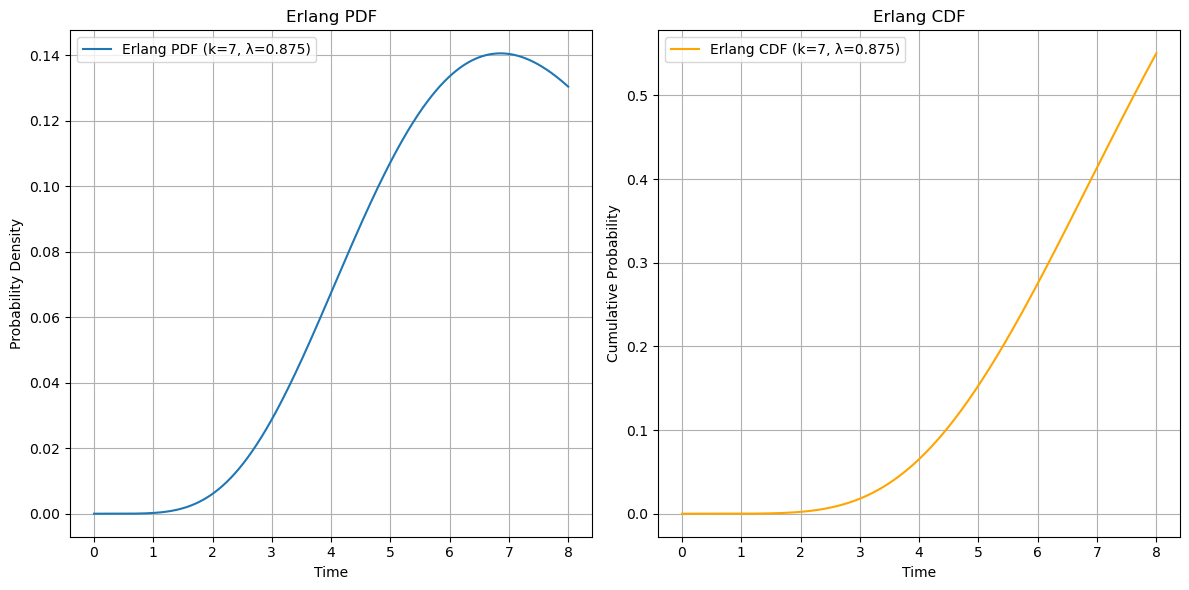

In [26]:
# Set parameters
rate_param = 0.875
scale_param = 1 / rate_param  # Scale parameter for Erlang distribution
k = 7  # Shape parameter (number of events)

# Define the time range for plotting
t_values = np.linspace(0, 8, 1000)

# Compute the PDF and CDF using scipy.stats.erlang
pdf_values = erlang.pdf(t_values, a=k, scale=scale_param)
cdf_values = erlang.cdf(t_values, a=k, scale=scale_param)

# Plot PDF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, pdf_values, label=f'Erlang PDF (k={k}, λ={rate_param})')
plt.title('Erlang PDF')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(t_values, cdf_values, label=f'Erlang CDF (k={k}, λ={rate_param})', color='orange')
plt.title('Erlang CDF')
plt.xlabel('Time')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In this project, we explore a number of properties of Poisson Point Processes. We've explored 3 important probability distributions used to describe their properties: the Poisson distribution, the Exponential distribution, and the Erlang distribution - a discrete case of the more general Gamma distribution, which was easier to manage in the discrete nature of the scenario we considered. We also demonstrated how to perform calculations under these distributions given a particular rate or scale paramete and visualized the distributions given the necessary parameters.

<H2>References</H2>

Bruce, Peter; Bruce, Andrew; Gedeck, Peter; *Practical Statistics for Data Scientists, Second Edition*, O'Reilly, 2020
<br><br>
Klenke, Achim, *Probability Theory: A Comprehensive Course, Second Edition*, Springer, 2014
<br></br>
Klingman, J. F. C., *Poisson Processes*, Clarendon Press, 1993
<br></br>
Ross, Sheldon, *A First Course in Probability Theory, Ninth Edition*, Pearson, 2016